<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Author: Kevin Markham (Washington, D.C.)_

---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

### Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Pandas

In [1]:
# Load Pandas into Python
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [3]:
users = pd.read_csv('./data/user.tbl', sep='|')

**Examine the users data.**

In [4]:
users                   # Print the first 30 and last 30 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [5]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [6]:
users.head()            # Print the first five rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
users.head(10)          # Print the first 10 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [8]:
users.tail()            # Print the last five rows.

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [10]:
 # The row index (aka "the row labels" — in this case integers)
users.index[0]          

0

In [11]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [12]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [13]:
# Number of rows and columns
users.shape

(943, 5)

In [14]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [15]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [18]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['gender'].shape
users['gender']

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [19]:
users[['gender']].shape
users[['gender']]

,gender
0,M
1,F
2,M
3,M
4,F
5,M
6,M
7,M
8,M
9,M


In [20]:
# DataFrame columns are Pandas Series.
type(users['gender'])

pandas.core.series.Series

In [22]:
type(users[['gender']])

pandas.core.frame.DataFrame

In [21]:
# Select one column using the DataFrame attribute.
users.gender

# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [22]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [23]:
# Describe all object columns (can include multiple types).
type(users.describe(include=['object']))

pandas.core.frame.DataFrame

In [24]:
a = users.describe(include=['object'])


In [25]:
a.head()

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [27]:
len(a.zip_code)

4

In [29]:
a['zip_counts'] = [len(a.zip_code), 19, 45, 29]

In [30]:
a

,gender,occupation,zip_code,zip_counts
count,943,943,943,4
unique,2,21,795,19
top,M,student,55414,45
freq,670,196,9,29


In [31]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [32]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [34]:
# Calculate the mean of the ages.
users.age.median()

31.0

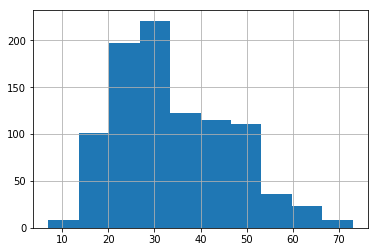

In [35]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist();

**Count the number of occurrences of each value.**

In [36]:
users.gender.value_counts()     # Most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

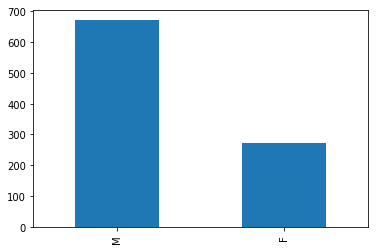

In [37]:
users.gender.value_counts().plot(kind='bar')     # Quick plot by category

In [38]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

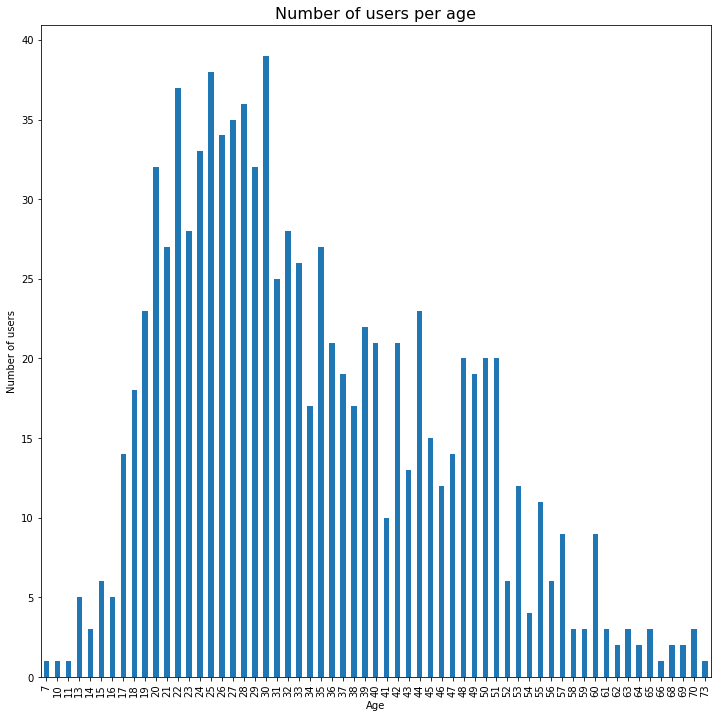

In [41]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age', fontsize=16);

<a id="exercise-one"></a>
### Exercise 1

In [42]:
pwd

'/Users/Alexanderhubbard/Documents/GA_TEACHING/DAT-course-materials-9-17-19/lessons/required/exploratory-data-analysis'

In [44]:
# Read drinks.csv into a DataFrame called "drinks".
import pandas as pd
drinks = pd.read_csv('data/drinks.csv')

In [42]:
# Print the head and the tail.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [43]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [44]:
# Examine the default index, datatypes, and shape.
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [46]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [47]:
drinks.shape

(193, 6)

In [50]:
# Print the beer_servings Series.
drinks[['beer_servings']].head()

,beer_servings
0,0
1,89
2,25
3,245
4,217


In [51]:
# Calculate the average beer_servings for the entire data set.
drinks[['beer_servings']].mean()

beer_servings    106.160622
dtype: float64

In [53]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**Logical filtering: Only show users with age < 20.**

In [45]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
users[users['age'] < 20].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [46]:
users.age < 20

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
913    False
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924     True
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [47]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
mask = users.age < 20
users[mask].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [52]:
# Or, combine into a single step.
mask = users.occupation == 'student'
student_frame = users[mask].reset_index(drop=True)
student_frame.tail()

,user_id,age,gender,occupation,zip_code
191,928,21,M,student,55408
192,933,28,M,student,48105
193,939,26,F,student,33319
194,941,20,M,student,97229
195,943,22,M,student,77841


In [57]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc and .iloc instead of the syntax below

student_frame.loc[:, 'new_age'] = 12
student_frame.tail()

,user_id,age,gender,occupation,zip_code,new_age
192,933,12,M,student,48105,12
193,939,12,F,student,33319,12
194,941,12,M,student,97229,12
195,943,12,M,student,77841,12
age,12,12,12,12,12,12


In [72]:
# Select one column from the filtered results.
#student_frame.iloc[:5, :2]
users.loc[8, 'age'] = 12

In [58]:
# value_counts of resulting Series
users.age.unique()

array([24, 53, 23, 33, 42, 57, 36, 29, 39, 28, 47, 45, 49, 21, 30, 35, 40,
       26, 25, 32, 41,  7, 38, 20, 19, 27, 18, 22, 37, 16, 50, 31, 51, 17,
       48, 34, 43, 60, 55, 15, 61, 44, 54, 59, 46, 13, 52, 56, 14, 66, 62,
       11, 65, 68, 63, 64, 10, 73, 58, 69, 70])

**Logical filtering with multiple conditions**

In [59]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [61]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
mask = (drinks.beer_servings > 25) & (drinks.continent == 'EU')
drinks[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU


In [62]:
mask = ((drinks.beer_servings > 25) & (drinks.continent == 'EU')) | (drinks.wine_servings > 200)
drinks[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
6,Argentina,193,25,221,8.3,SA
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [63]:
# Preferred alternative to multiple `OR` conditions
#users[users.occupation.isin(['doctor', 'lawyer'])]
users[['age', 'occupation', 'gender']].head()

,age,occupation,gender
0,24,technician,M
1,53,other,F
2,23,writer,M
3,24,technician,M
4,33,other,F


In [64]:
a = ['a', 'b', 'c', 10]
for entry in a:
    if entry in users.age:
        print(entry)

10


**Sorting**

In [65]:
# Sort a Series.
users.age.sort_values()
# def jacob_fun(a = True):
#     '''
#     This is a function that has a docstring.
#     Like they all should.
#     '''
#     pass

29      7
470    10
288    11
879    13
608    13
141    13
673    13
627    13
812    14
205    14
886    14
848    15
280    15
460    15
617    15
178    15
100    15
56     16
579    16
549    16
450    16
433    16
620    17
618    17
760    17
374    17
903    17
645    17
581    17
256    17
       ..
89     60
307    60
930    60
751    60
468    60
463    60
233    60
693    60
933    61
350    61
105    61
519    62
265    62
857    63
776    63
363    63
844    64
422    64
317    65
650    65
563    65
210    66
348    68
572    68
558    69
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [66]:
users.sort_values('age')

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
141,142,13,M,other,48118
673,674,13,F,student,55337
627,628,13,M,none,94306
812,813,14,F,student,02136
205,206,14,F,student,53115


In [67]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [68]:
users.sort_values('age', inplace = True)
users

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
141,142,13,M,other,48118
673,674,13,F,student,55337
627,628,13,M,none,94306
812,813,14,F,student,02136
205,206,14,F,student,53115


In [69]:
users.age.sort_values(inplace = True)

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [70]:
# Sort a DataFrame by a single column.
g = users.age
#users.sort_values('age')
id(g)

4595019560

In [71]:
id(users.age)

4595019560

In [74]:
g.sort_values(inplace = True)

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [75]:
# Use descending order instead.
users.sort_values('age', ascending=False).head()

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
859,860,70,F,retired,48322
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
584,585,69,M,librarian,98501


In [76]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'], ascending = [True, False]).head()

,user_id,age,gender,occupation,zip_code
802,803,70,M,administrator,78212
265,266,62,F,administrator,78756
818,819,59,M,administrator,40205
130,131,59,F,administrator,15237
6,7,57,M,administrator,91344


<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [101]:
# Filter DataFrame to only include European countries.
drinks[drinks.continent == 'EU'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [102]:
# Filter DataFrame to only include European countries with wine_servings > 300.
drinks[(drinks.continent == 'EU') & (drinks.wine_servings > 300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [104]:
# Calculate the average beer_servings for all of Europe.
mask = drinks.continent == 'EU'
drinks[mask]['beer_servings'].mean()

193.77777777777777

In [80]:
drinks.loc[mask, 'beer_servings'].mean()

207.53333333333333

In [108]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.
big_drinkers = drinks.nlargest(10, 'total_litres_of_pure_alcohol')

In [109]:
big_drinkers

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
99,Luxembourg,236,133,271,11.4,EU
155,Slovakia,196,293,116,11.4,EU


In [112]:
d = drinks.sort_values('total_litres_of_pure_alcohol', ascending = False).iloc[:10]

In [114]:
id(drinks)

4779435288

In [116]:
d.beer_servings = 19

<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

In [81]:
# Print the column labels
print(drinks.columns)

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')


In [83]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

In [119]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [84]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)

In [85]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [86]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [87]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [94]:
drinks.loc[drinks['country'] != 'Afghanistan']

,country,beer,spirit,wine,liters,continent,servings,mL
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,4900.0
6,Argentina,193,25,221,8.3,SA,439,8300.0
7,Armenia,21,179,11,3.8,EU,211,3800.0
8,Australia,261,72,212,10.4,OC,545,10400.0
9,Austria,279,75,191,9.7,EU,545,9700.0
10,Azerbaijan,21,46,5,1.3,EU,72,1300.0


In [95]:
# axis=0 for rows, 1 for columns

# drinks.drop(drinks[drinks.spirit == 138].index.values[0])
drinks.drop(13)
drinks.iloc[13]

country      Bangladesh
beer                  0
spirit                0
wine                  0
liters                0
continent            AS
servings              0
mL                    0
Name: 13, dtype: object

In [97]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [98]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [99]:
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [100]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [101]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [102]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().sum()

23

In [ ]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

In [103]:
# True if not missing, False if missing
drinks.continent.notnull()

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172     True
173     True
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
Name: continent, Length: 193, dtype: bool

In [105]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()].continent.value_counts(dropna=False)

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

**Understanding Pandas Axis**

In [141]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

country     AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                    20489
spirit                                                  15632
wine                                                     9544
liters                                                  910.4
servings                                                45665
mL                                                     910400
dtype: object

In [142]:
# axis=0 is the default.
drinks.sum()

country     AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                    20489
spirit                                                  15632
wine                                                     9544
liters                                                  910.4
servings                                                45665
mL                                                     910400
dtype: object

In [106]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks['wine_liters'] = drinks[['wine', 'liters']].sum(axis=1)

In [107]:
drinks.wine_liters

0        0.0
1       58.9
2       14.7
3      324.4
4       50.9
5       49.9
6      229.3
7       14.8
8      222.4
9      200.7
10       6.3
11      57.3
12       9.0
13       0.0
14      42.3
15      56.4
16     222.5
17      14.8
18      14.1
19       0.4
20      11.8
21      12.6
22      40.4
23      23.2
24       1.6
25     104.3
26      11.3
27       6.3
28      11.0
29      20.0
       ...  
163     12.6
164      6.7
165    193.2
166    290.2
167     17.0
168      0.3
169      7.4
170     89.9
171      4.1
172     20.3
173      6.1
174     13.4
175     21.3
176      8.4
177     34.2
178     10.0
179      8.3
180     53.9
181      7.8
182    205.4
183      6.7
184     92.7
185    226.6
186     10.4
187     11.9
188     10.7
189      3.0
190      0.1
191      6.5
192      8.7
Name: wine_liters, Length: 193, dtype: float64

**Find missing values in a `DataFrame`.**

In [108]:
# DataFrame of Booleans
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
country        193 non-null object
beer           193 non-null int64
spirit         193 non-null int64
wine           193 non-null int64
liters         193 non-null float64
continent      170 non-null object
wine_liters    193 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.6+ KB


country         0
beer            0
spirit          0
wine            0
liters          0
continent      23
wine_liters     0
dtype: int64


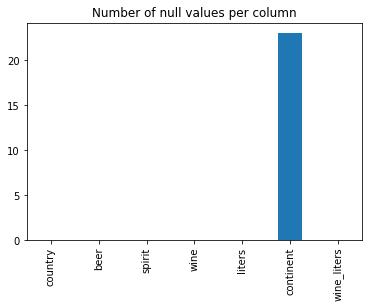

In [109]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [110]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent,wine_liters
0,Afghanistan,0,0,0,0.0,AS,0.0
1,Albania,89,132,54,4.9,EU,58.9
2,Algeria,25,0,14,0.7,AF,14.7
3,Andorra,245,138,312,12.4,EU,324.4
4,Angola,217,57,45,5.9,AF,50.9
6,Argentina,193,25,221,8.3,SA,229.3
7,Armenia,21,179,11,3.8,EU,14.8
8,Australia,261,72,212,10.4,OC,222.4
9,Austria,279,75,191,9.7,EU,200.7
10,Azerbaijan,21,46,5,1.3,EU,6.3


In [111]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent,wine_liters
0,Afghanistan,0,0,0,0.0,AS,0.0
1,Albania,89,132,54,4.9,EU,58.9
2,Algeria,25,0,14,0.7,AF,14.7
3,Andorra,245,138,312,12.4,EU,324.4
4,Angola,217,57,45,5.9,AF,50.9
5,Antigua & Barbuda,102,128,45,4.9,NaN,49.9
6,Argentina,193,25,221,8.3,SA,229.3
7,Armenia,21,179,11,3.8,EU,14.8
8,Australia,261,72,212,10.4,OC,222.4
9,Austria,279,75,191,9.7,EU,200.7


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [112]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
5      NA
6      SA
7      EU
8      OC
9      EU
10     EU
11     NA
12     AS
13     AS
14     NA
15     EU
16     EU
17     NA
18     AF
19     AS
20     SA
21     EU
22     AF
23     SA
24     AS
25     EU
26     AF
27     AF
28     AF
29     AF
       ..
163    SA
164    AF
165    EU
166    EU
167    AS
168    AS
169    AS
170    EU
171    AS
172    AF
173    OC
174    NA
175    AF
176    AS
177    AS
178    OC
179    AF
180    EU
181    AS
182    EU
183    AF
184    NA
185    SA
186    AS
187    OC
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [113]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [114]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols, na_filter=False)

In [115]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [151]:
drinks.isnull().sum()

country      0
beer         0
spirit       0
wine         0
liters       0
continent    0
dtype: int64

<a id="exercise-three"></a>
### Exercise 3

In [124]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = 'data/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [117]:
# Check the shape of the DataFrame.
ufo.shape

(80543, 5)

In [118]:
# What are the three most common colors reported?
ufo['Colors Reported'].value_counts().head(3)

ORANGE    5216
RED       4809
GREEN     1897
Name: Colors Reported, dtype: int64

In [125]:
# Rename any columns with spaces so that they don't contain spaces.
columns = []
for col in ufo.columns:
    columns.append(col.lower().replace(' ', '_')) 

ufo.columns = columns
ufo

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [129]:
# For reports in VA, what's the most common city?
ufo.loc[ufo['state'] == 'VA', 'city'].value_counts().head(1)

Virginia Beach    110
Name: city, dtype: int64

In [131]:
# Print a DataFrame containing only reports from Arlington, VA.

ufo.loc[((ufo['state'] == 'VA') & (ufo['city'] == 'Arlington'))]

,city,colors_reported,shape_reported,state,time
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
6300,Arlington,NaN,CHEVRON,VA,5/5/1990 21:40
10278,Arlington,NaN,DISK,VA,5/27/1997 15:30
14527,Arlington,NaN,OTHER,VA,9/10/1999 21:41
17984,Arlington,RED,DISK,VA,11/19/2000 22:00
21201,Arlington,GREEN,FIREBALL,VA,1/7/2002 17:45
22633,Arlington,NaN,LIGHT,VA,7/26/2002 1:15
22780,Arlington,NaN,LIGHT,VA,8/7/2002 21:00
25066,Arlington,NaN,CIGAR,VA,6/1/2003 22:34
27398,Arlington,NaN,VARIOUS,VA,12/13/2003 2:00


In [133]:
# Count the number of missing values in each column.

ufo.isnull().sum()

city                  47
colors_reported    63509
shape_reported      8402
state                  0
time                   0
dtype: int64

In [134]:
# How many rows remain if you drop all rows with any missing values?

ufo.dropna().shape

(15510, 5)

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [135]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [138]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [139]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [141]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
drinks.groupby('continent').agg(['count', 'mean', 'min', 'max'])['beer'].sort_values('mean')

,count,mean,min,max
continent,,,,
AS,44,37.045455,0,247
AF,53,61.471698,0,376
OC,16,89.687500,0,306
NA,23,145.434783,1,285
SA,12,175.083333,93,333
EU,45,193.777778,0,361


In [144]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe().transpose()

continent             AF          AS          EU          NA          OC  \
beer   count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    61.471698   37.045455  193.777778  145.434783   89.687500   
       std     80.557816   49.469725   99.631569   79.621163   96.641412   
       min      0.000000    0.000000    0.000000    1.000000    0.000000   
       25%     15.000000    4.250000  127.000000   80.000000   21.000000   
       50%     32.000000   17.500000  219.000000  143.000000   52.500000   
       75%     76.000000   60.500000  270.000000  198.000000  125.750000   
       max    376.000000  247.000000  361.000000  285.000000  306.000000   
spirit count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    16.339623   60.840909  132.555556  165.739130   58.437500   
       std     28.102794   84.362160   77.589115   94.993884   70.504817   
       min      0.000000    0.000000    0.000000   68.000000    0.000000   
       25%      1.000000    1.000000   81.000000  101.000000   18.000000   
       50%      3.000000   16.000000  122.000000  137.000000   37.000000   
       75%     19.000000   98.000000  173.000000  190.500000   65.250000   
       max    152.000000  326.000000  373.000000  438.000000  254.000000   
wine   count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    16.264151    9.068182  142.222222   24.521739   35.625000   
       std     38.846419   21.667034   97.421738   28.266378   64.555790   
       min      0.000000    0.000000    0.000000    1.000000    0.000000   
       25%      1.000000    0.000000   59.000000    5.000000    1.000000   
       50%      2.000000    1.000000  128.000000   11.000000    8.500000   
       75%     13.000000    8.000000  195.000000   34.000000   23.250000   
       max    233.000000  123.000000  370.000000  100.000000  212.000000   
liters count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean     3.007547    2.170455    8.617778    5.995652    3.381250   
       std      2.647557    2.770239    3.358455    2.409353    3.345688   
       min      0.000000    0.000000    0.000000    2.200000    0.000000   
       25%      0.700000    0.100000    6.600000    4.300000    1.000000   
       50%      2.300000    1.200000   10.000000    6.300000    1.750000   
       75%      4.700000    2.425000   10.900000    7.000000    6.150000   
       max      9.100000   11.500000   14.400000   11.900000   10.400000   

continent             SA  
beer   count   12.000000  
       mean   175.083333  
       std     65.242845  
       min     93.000000  
       25%    129.500000  
       50%    162.500000  
       75%    198.000000  
       max    333.000000  
spirit count   12.000000  
       mean   114.750000  
       std     77.077440  
       min     25.000000  
       25%     65.750000  
       50%    108.500000  
       75%    148.750000  
       max    302.000000  
wine   count   12.000000  
       mean    62.416667  
       std     88.620189  
       min      1.000000  
       25%      3.000000  
       50%     12.000000  
       75%     98.500000  
       max    221.000000  
liters count   12.000000  
       mean     6.308333  
       std      1.531166  
       min      3.800000  
       25%      5.250000  
       50%      6.850000  
       75%      7.375000  
       max      8.300000

In [145]:
# For each continent, count the number of rows.
print((drinks.groupby('continent').continent.count()))
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [150]:
# For each occupation in "users", count the number of occurrences.

users['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [152]:
# For each occupation, calculate the mean age.

users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [154]:
# For each occupation, calculate the minimum and maximum ages.

users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [157]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [159]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['city', 'state']     # Create a list of column names...
ufo[my_cols]                    # ...and use that list to select columns.

,city,state
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [160]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['city', 'state']]

,city,state
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


**Use `loc` to select columns by name.**

In [163]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'city']  

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
5                 Valley City
6                 Crater Lake
7                        Alma
8                     Eklutna
9                     Hubbard
10                    Fontana
11                   Waterloo
12                     Belton
13                     Keokuk
14                  Ludington
15                Forest Home
16                Los Angeles
17                  Hapeville
18                     Oneida
19                 Bering Sea
20                   Nebraska
21                        NaN
22                        NaN
23                  Owensboro
24                 Wilderness
25                  San Diego
26                 Wilderness
27                     Clovis
28                 Los Alamos
29               Ft. Duschene
                 ...         
80513              Manahawkin
80514             New Bedford
80515     

In [164]:
# Select two columns.
ufo.loc[:, ['city', 'state']]

,city,state
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [165]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'city':'state']

,city,colors_reported,shape_reported,state
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [166]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

city                       Ithaca
colors_reported               NaN
shape_reported           TRIANGLE
state                          NY
time               6/1/1930 22:00
Name: 0, dtype: object

In [167]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [169]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'city':'state'] 

,city,colors_reported,shape_reported,state
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [170]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0/3 (City/State)
ufo.iloc[:, [0, 3]]

,city,state
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [171]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4]

,city,colors_reported,shape_reported,state
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [172]:
# Rows in position 0/1/2, all columns
ufo.iloc[0:3, :] 

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [177]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'data/movies.tbl'

movies = pd.read_table(
    movies_filename,
    sep='|',
    header=None,
    names=movie_cols,
    usecols=[0, 1],
    encoding='latin-1')

movies.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: read_table is deprecated, use read_csv instead.
  # This is added back by InteractiveShellApp.init_path()


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [178]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'data/movie_ratings.tsv'

ratings = pd.read_table(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [179]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [180]:
movies.merge(ratings, how='inner', on='movie_id')

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
5,1,Toy Story (1995),5,4,875635748
6,1,Toy Story (1995),109,4,880563619
7,1,Toy Story (1995),181,3,878962392
8,1,Toy Story (1995),95,5,879197329
9,1,Toy Story (1995),268,3,875742341


In [181]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [182]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda row: row < 30)
users

,user_id,age,gender,occupation,zip_code,under30
29,30,7,M,student,55436,True
470,471,10,M,student,77459,True
288,289,11,M,none,94619,True
879,880,13,M,student,83702,True
608,609,13,F,student,55106,True
141,142,13,M,other,48118,True
673,674,13,F,student,55337,True
627,628,13,M,none,94306,True
812,813,14,F,student,02136,True
205,206,14,F,student,53115,True


In [184]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: (row.age < 30) and (row.gender == 'M'), axis=1)
users

,user_id,age,gender,occupation,zip_code,under30,under30male
29,30,7,M,student,55436,True,True
470,471,10,M,student,77459,True,True
288,289,11,M,none,94619,True,True
879,880,13,M,student,83702,True,True
608,609,13,F,student,55106,True,False
141,142,13,M,other,48118,True,True
673,674,13,F,student,55337,True,False
627,628,13,M,none,94306,True,True
812,813,14,F,student,02136,True,False
205,206,14,F,student,53115,True,False


In [185]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})
users

,user_id,age,gender,occupation,zip_code,under30,under30male,is_male
29,30,7,M,student,55436,True,True,1
470,471,10,M,student,77459,True,True,1
288,289,11,M,none,94619,True,True,1
879,880,13,M,student,83702,True,True,1
608,609,13,F,student,55106,True,False,0
141,142,13,M,other,48118,True,True,1
673,674,13,F,student,55337,True,False,0
627,628,13,M,none,94306,True,True,1
812,813,14,F,student,02136,True,False,0
205,206,14,F,student,53115,True,False,0


In [187]:
# Replace all instances of a value in a column (must match entire value).
ufo.state.replace('Fl', 'FL', inplace=True)
ufo

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [189]:
# String methods are accessed via "str".
ufo.state.str.upper()                               # Converts to upper case
# checks for a substring
ufo['colors_reported'].str.contains('RED', na='False') 
ufo

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [191]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['time'] = pd.to_datetime(ufo.time)
ufo.time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.time.max() - ufo.time.min()).days  # Also allows you to do datetime "math"

30776

In [193]:
# Set and then remove an index.
# ufo.set_index('time', inplace=True)
ufo.reset_index(inplace=True)
ufo

,time,city,colors_reported,shape_reported,state
0,1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1,1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
2,1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
3,1931-06-01 13:00:00,Abilene,NaN,DISK,KS
4,1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY
5,1934-09-15 15:30:00,Valley City,NaN,DISK,ND
6,1935-06-15 00:00:00,Crater Lake,NaN,CIRCLE,CA
7,1936-07-15 00:00:00,Alma,NaN,DISK,MI
8,1936-10-15 17:00:00,Eklutna,NaN,CIGAR,AK
9,1937-06-15 00:00:00,Hubbard,NaN,CYLINDER,OR


In [194]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [195]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]
continent_dummies

,cont_AS,cont_EU,cont_NA,cont_OC,cont_SA
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,1,0,0,0
8,0,0,0,1,0
9,0,1,0,0,0


In [196]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)
drinks

,country,beer,spirit,wine,liters,continent,cont_AS,cont_EU,cont_NA,cont_OC,cont_SA
0,Afghanistan,0.0,0,0,0.0,AS,1,0,0,0,0
1,Albania,89.0,132,54,4.9,EU,0,1,0,0,0
2,Algeria,25.0,0,14,0.7,AF,0,0,0,0,0
3,Andorra,245.0,138,312,12.4,EU,0,1,0,0,0
4,Angola,217.0,57,45,5.9,AF,0,0,0,0,0
5,Antigua & Barbuda,102.0,128,45,4.9,NA,0,0,1,0,0
6,Argentina,193.0,25,221,8.3,SA,0,0,0,0,1
7,Armenia,21.0,179,11,3.8,EU,0,1,0,0,0
8,Australia,261.0,72,212,10.4,OC,0,0,0,1,0
9,Austria,279.0,75,191,9.7,EU,0,1,0,0,0


<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [ ]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [ ]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

In [ ]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)